In [1]:
import pandas as pd
import os
import numpy as np
import pickle 
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.optimizers import Adam, RMSprop

In [3]:
df3=pd.read_csv("/kaggle/input/enghin/Hindi_English_Truncated_Corpus.csv")

In [4]:
pd.set_option('display.max_colwidth',None)

In [5]:
df3=df3.drop('english_sentence',axis=1)
df3=df3.drop('source',axis=1)


In [6]:
df3.head()

,hindi_sentence
0,"राजनीतिज्ञों के पास जो कार्य करना चाहिए, वह करने कि अनुमति नहीं है ."
1,"मई आपको ऐसे ही एक बच्चे के बारे में बताना चाहूंगी,"
2,यह प्रतिशत भारत में हिन्दुओं प्रतिशत से अधिक है।
3,हम ये नहीं कहना चाहते कि वो ध्यान नहीं दे पाते
4,इन्हीं वेदों का अंतिम भाग उपनिषद कहलाता है।


In [7]:
# df3=df3.iloc[:20000]

In [8]:
def count_length():
    df3['word_count'] = df3['hindi_sentence'].apply(lambda x: len(str(x).split(" ")))

In [9]:
# count_length()
# df3['word_count'].iloc[:20000]

In [10]:
df3.head()

,hindi_sentence
0,"राजनीतिज्ञों के पास जो कार्य करना चाहिए, वह करने कि अनुमति नहीं है ."
1,"मई आपको ऐसे ही एक बच्चे के बारे में बताना चाहूंगी,"
2,यह प्रतिशत भारत में हिन्दुओं प्रतिशत से अधिक है।
3,हम ये नहीं कहना चाहते कि वो ध्यान नहीं दे पाते
4,इन्हीं वेदों का अंतिम भाग उपनिषद कहलाता है।


In [11]:
# stopwords_hi = ['मैं','मेरे','जी','श्री', 'उस', 'उसके', 'उसी', 'उसे', 'एवं', 'एस', 'ऐसे', 'और', 'कई', 'कर','करता', 'करते', 'करना', 'करने', 'करें', 'कहते', 'कहा', 'का', 'काफ़ी', 'कि', 'कितना', 'किन्हें', 'किन्हों', 'किया', 'किर', 'किस', 'किसी', 'किसे', 'की', 'कुछ', 'कुल', 'के', 'को', 'कोई', 'कौन', 'गया', 'घर', 'जब', 'जहाँ', 'जा', 'जितना', 'जिन', 'जिन्हें', 'जिन्हों', 'जिस', 'जिसे', 'जीधर', 'जैसा', 'जैसे', 'जो', 'तक', 'तब', 'तरह', 'तिन', 'तिन्हें', 'तिन्हों', 'तिस', 'तिसे', 'तो', 'था', 'थी', 'थे', 'दबारा', 'दिया', 'दुसरा', 'दूसरे', 'दो', 'द्वारा', 'न', 'नहीं', 'ना', 'निहायत', 'नीचे', 'ने', 'पर', 'पर', 'पहले', 'पूरा', 'पे', 'फिर', 'बनी', 'बही', 'बहुत', 'बाद', 'बाला', 'बिलकुल', 'भी', 'भीतर', 'मगर', 'मानो', 'मे', 'में', 'यदि', 'यह', 'यहाँ', 'यही', 'या', 'यिह', 'ये', 'रखें', 'रहा', 'रहे', 'ऱ्वासा', 'लिए', 'लिये', 'लेकिन', 'व', 'वर्ग', 'वह', 'वह', 'वहाँ', 'वहीं', 'वाले', 'वुह', 'वे', 'वग़ैरह', 'संग', 'सकता', 'सकते', 'सबसे', 'सभी', 'साथ', 'साबुत', 'साभ', 'सारा', 'से', 'सो', 'ही', 'हुआ', 'हुई', 'हुए', 'है', 'हैं', 'हो', 'होता', 'होती', 'होते', 'होना', 'होने', 'अपनि', 'जेसे', 'होति', 'सभि', 'तिंहों', 'इंहों', 'दवारा', 'इसि', 'किंहें', 'थि', 'उंहों', 'ओर', 'जिंहें', 'वहिं', 'अभि', 'बनि', 'हि', 'उंहिं', 'उंहें', 'हें', 'वगेरह', 'एसे', 'रवासा', 'कोन', 'निचे', 'काफि', 'उसि', 'पुरा', 'भितर', 'हे', 'बहि', 'वहां', 'कोइ', 'यहां', 'जिंहों', 'तिंहें', 'किसि', 'कइ', 'यहि', 'इंहिं', 'जिधर', 'इंहें', 'अदि', 'इतयादि', 'हुइ', 'कोनसा', 'इसकि', 'दुसरे', 'जहां', 'अप', 'किंहों', 'उनकि', 'भि', 'वरग', 'हुअ', 'जेसा', 'नहिं']
# punctuations = ['nn','n', '।','/', '+','?','$','@','_','!',',',':','^','|','=','%','&','.','#','*',';','-']
# to_be_removed = punctuations


In [12]:
df3['hindi_sentence'] = df3['hindi_sentence'].str.replace('\d+', '')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [13]:
df3.head()

,hindi_sentence
0,"राजनीतिज्ञों के पास जो कार्य करना चाहिए, वह करने कि अनुमति नहीं है ."
1,"मई आपको ऐसे ही एक बच्चे के बारे में बताना चाहूंगी,"
2,यह प्रतिशत भारत में हिन्दुओं प्रतिशत से अधिक है।
3,हम ये नहीं कहना चाहते कि वो ध्यान नहीं दे पाते
4,इन्हीं वेदों का अंतिम भाग उपनिषद कहलाता है।


In [14]:
# import re

# for i in range(len(df3)):
#     if isinstance(df3['hindi_sentence'][i], str):
#         df3['hindi_sentence'][i] = re.sub(r'[^\w\s]', '', df3['hindi_sentence'][i])

In [15]:
df3.head()

,hindi_sentence
0,"राजनीतिज्ञों के पास जो कार्य करना चाहिए, वह करने कि अनुमति नहीं है ."
1,"मई आपको ऐसे ही एक बच्चे के बारे में बताना चाहूंगी,"
2,यह प्रतिशत भारत में हिन्दुओं प्रतिशत से अधिक है।
3,हम ये नहीं कहना चाहते कि वो ध्यान नहीं दे पाते
4,इन्हीं वेदों का अंतिम भाग उपनिषद कहलाता है।


In [16]:
df3[:10]

,hindi_sentence
0,"राजनीतिज्ञों के पास जो कार्य करना चाहिए, वह करने कि अनुमति नहीं है ."
1,"मई आपको ऐसे ही एक बच्चे के बारे में बताना चाहूंगी,"
2,यह प्रतिशत भारत में हिन्दुओं प्रतिशत से अधिक है।
3,हम ये नहीं कहना चाहते कि वो ध्यान नहीं दे पाते
4,इन्हीं वेदों का अंतिम भाग उपनिषद कहलाता है।
5,"कश्मीर के तत्कालीन गवर्नर ने इस हस्तांतरण का विरोध किया था , लेकिन अंग्रेजों की सहायता से उनकी आवाज दबा दी गयी ."
6,इसमें तुमसे पूर्व गुज़रे हुए लोगों के हालात हैं।
7,और हम होते कौन हैं यह कहने भी वाले कि वे गलत हैं
8,ग्लोबल वॉर्मिंग से आशय हाल ही के दशकों में हुई वार्मिंग और इसके निरंतर बने रहने के अनुमान और इसके अप्रत्यक्ष रूप से मानव पर पड़ने वाले प्रभाव से है।
9,"हो सकता है कि आप चाहते हों कि आप का नऋर्नमेनटेन्ड ह्यबिना किसी समर्थन के हृ विशेष स्कूल , या किसी स्वतंत्र स्कूल में जाए , इजसके पास विशेष शैक्षणिक जऋऋरतों वाले बच्चों के प्रति सहूलियत हों . ."


In [17]:
from gensim.models import Word2Vec
from tqdm import tqdm



In [43]:
sentences = df3['hindi_sentence'].tolist()
sentences = [[word for word in sentence.split() if word] for sentence in sentences]



In [44]:
# train Word2Vec model
tr = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)


In [45]:
word_vectors = tr.wv
word_index = {word: i for i, word in enumerate(word_vectors.index_to_key)}
embedding_matrix = np.zeros((len(word_vectors.index_to_key), 100))
for i, word in enumerate(word_vectors.index_to_key):
    embedding_vector = word_vectors.get_vector(word)
    embedding_matrix[i] = embedding_vector

In [46]:
# vectorize the 'hindi_sentence' column, leaving out the last word of each sentence
vectors = []
targets = []
for sentence in tqdm(sentences, desc='Vectorizing sentences'):
    vector = [word_index[word] for word in sentence[:-1] if word in word_index]
    if vector:
        vectors.append(vector)
        targets.append(word_index[sentence[-1]])



Vectorizing sentences: 100%|██████████| 127607/127607 [00:00<00:00, 181301.27it/s]


In [22]:
# convert the vectors and targets to numpy arrays
vectors = np.array(vectors, dtype='object')
targets = np.array(targets, dtype='object')

In [23]:
len(word_index),embedding_matrix.shape,len(vectors),len(targets)

(89845, (89845, 100), 123952, 123952)

In [24]:
model = Sequential()
model.add(Embedding(input_dim=len(word_index), output_dim=100, weights=[embedding_matrix]))
model.add(Bidirectional(LSTM(128), input_shape=(None, 100)))
model.add(Dense(len(word_index), activation='softmax'))

In [25]:
optimizer = RMSprop(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         8984500   
                                                                 
 bidirectional (Bidirectiona  (None, 256)              234496    
 l)                                                              
                                                                 
 dense (Dense)               (None, 89845)             23090165  
                                                                 
Total params: 32,309,161
Trainable params: 32,309,161
Non-trainable params: 0
_________________________________________________________________


In [28]:
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [31]:
p_vectors = pad_sequences(vectors,padding='post')
p_vectors,targets

(array([[10161,     0,   126, ...,     0,     0,     0],
        [ 1121,   166,   143, ...,     0,     0,     0],
        [   15,   239,    42, ...,     0,     0,     0],
        ...,
        [  211,    35, 12892, ...,     0,     0,     0],
        [80370,     9,   216, ...,     0,     0,     0],
        [  585,    20,     1, ...,     0,     0,     0]], dtype=int32),
 array([2, 17963, 26, ..., 2, 2, 2754], dtype=object))

In [34]:
vectors = np.array(p_vectors, dtype='float32')
targets = np.array(targets, dtype='float32')

In [35]:
vectors,targets

(array([[1.0161e+04, 0.0000e+00, 1.2600e+02, ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [1.1210e+03, 1.6600e+02, 1.4300e+02, ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [1.5000e+01, 2.3900e+02, 4.2000e+01, ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        ...,
        [2.1100e+02, 3.5000e+01, 1.2892e+04, ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [8.0370e+04, 9.0000e+00, 2.1600e+02, ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [5.8500e+02, 2.0000e+01, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00]], dtype=float32),
 array([2.0000e+00, 1.7963e+04, 2.6000e+01, ..., 2.0000e+00, 2.0000e+00,
        2.7540e+03], dtype=float32))

In [39]:
model.fit(vectors, targets,batch_size=256, epochs=20, validation_split=0.3)

Epoch 1/20
339/339 [==============================] - 57s 168ms/step - loss: 1.0316 - accuracy: 0.8130 - val_loss: 2.7220 - val_accuracy: 0.6307
Epoch 2/20
339/339 [==============================] - 57s 167ms/step - loss: 1.0091 - accuracy: 0.8171 - val_loss: 2.7283 - val_accuracy: 0.6359
Epoch 3/20
339/339 [==============================] - 57s 168ms/step - loss: 0.9864 - accuracy: 0.8206 - val_loss: 2.7341 - val_accuracy: 0.6376
Epoch 4/20
339/339 [==============================] - 53s 158ms/step - loss: 0.9646 - accuracy: 0.8237 - val_loss: 2.7621 - val_accuracy: 0.6341
Epoch 5/20
339/339 [==============================] - 57s 168ms/step - loss: 0.9450 - accuracy: 0.8268 - val_loss: 2.7939 - val_accuracy: 0.6281
Epoch 6/20
339/339 [==============================] - 54s 159ms/step - loss: 0.9241 - accuracy: 0.8304 - val_loss: 2.7961 - val_accuracy: 0.6297
Epoch 7/20
339/339 [==============================] - 54s 158ms/step - loss: 0.9045 - accuracy: 0.8329 - val_loss: 2.7859 - val_ac

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         8984500   
                                                                 
 bidirectional (Bidirectiona  (None, 256)              234496    
 l)                                                              
                                                                 
 dense (Dense)               (None, 89845)             23090165  
                                                                 
Total params: 32,309,161
Trainable params: 32,309,161
Non-trainable params: 0
_________________________________________________________________


In [63]:
import pickle
model.save('word_prediction_in_hindi_model.h5')

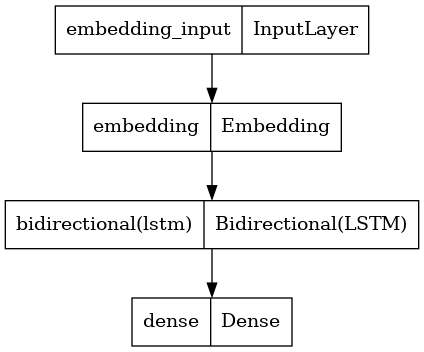

In [42]:
from keras.utils.vis_utils import plot_model
plot_model(model)

In [55]:
seed_text = "मगर उनके "
# निधन के पश्चात उनके भाई सरदार वल्लभ भाई पटेल ने इस वसीयत को स्वीकार नहीं किया और उसपर अदालत में मुकदमा चलाया।

In [62]:
def preprocess_text(text, word_index):
    tokens = text.split()
    word_indices = []
    for token in tokens:
        if token in word_index:
            word_indices.append(word_index[token])
    preprocessed_text = np.reshape(word_indices, (1, -1))
    
    return preprocessed_text


In [59]:
def gen_hindi_text(input_sentence):
    preprocessed_sentence = preprocess_text(input_sentence, word_index)
    probabilities = model.predict(preprocessed_sentence)
    top_predicted_words = [word_vectors.index_to_key[index] for index in np.argsort(probabilities[0])[::-1][:5]]
    print(top_predicted_words)


In [61]:
input_sentence = 'के पश्चात उनके भाई '
gen_hindi_text(input_sentence)

1/1 [==============================] - 0s 22ms/step
['भागदौड़', 'थे।', 'गए.', 'हों.', 'लिया।']
